# Exploring Pandas with Airbnb data

## Dataset

### Milan Airbnb Open Data

- `Airbnb_Milan.csv`

- `csv` : 61 columns extending the previous dataset

- [https://www.kaggle.com/datasets/antoniokaggle/milan-airbnb-open-data-only-entire-apartments](https://www.kaggle.com/datasets/antoniokaggle/milan-airbnb-open-data-only-entire-apartments)

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [13]:
conv = {
    'review_scores_rating': lambda x: int(x) / 10,
    'review_scores_accuracy': lambda x: int(x) / 10,
    'review_scores_cleanliness': lambda x: int(x) / 10,
    'review_scores_checkin': lambda x: int(x) / 10,
    'review_scores_communication': lambda x: int(x) / 10,
    'review_scores_location': lambda x: int(x) / 10,
    'review_scores_value': lambda x: int(x) / 10,
}

In [14]:
datafile = '/Users/flint/Data/milan/Airbnb_Milan.csv'
milan = pd.read_csv(datafile, index_col=0, converters=conv)

In [15]:
milan.review_scores_rating

1        9.4
2       10.0
3        9.7
4        9.7
5        9.0
        ... 
9318    10.0
9319    10.0
9320    10.0
9321    10.0
9322    10.0
Name: review_scores_rating, Length: 9322, dtype: float64

In [17]:
milan.shape

(9322, 60)

In [19]:
milan.tail(2)

,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in
9321,36305676,171239896,1,1,40,0,3,1,0,9,...,1,0,0,0,0,0,0,0,0,0
9322,36463651,174590119,1,1,57,0,14,1,0,9,...,1,0,0,0,0,0,1,0,0,0


In [20]:
milan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9322 entries, 1 to 9322
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                9322 non-null   int64  
 1   host_id                           9322 non-null   int64  
 2   host_location                     9322 non-null   int64  
 3   host_response_time                9322 non-null   int64  
 4   host_response_rate                9322 non-null   int64  
 5   host_is_superhost                 9322 non-null   int64  
 6   host_total_listings_count         9322 non-null   int64  
 7   host_has_profile_pic              9322 non-null   int64  
 8   host_identity_verified            9322 non-null   int64  
 9   neighbourhood_cleansed            9322 non-null   int64  
 10  zipcode                           9322 non-null   int64  
 11  latitude                          9322 non-null   float64
 12  longit

In [23]:
milan.describe()[['review_scores_rating', 'review_scores_accuracy', 
                  'review_scores_cleanliness']]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness
count,9322.000000,9322.000000,9322.000000
mean,9.314793,0.959794,0.945709
std,0.833768,0.079890,0.087051
min,2.000000,0.200000,0.200000
25%,9.000000,0.900000,0.900000
50%,9.500000,1.000000,1.000000
75%,9.900000,1.000000,1.000000
max,10.000000,1.000000,1.000000


In [26]:
milan[['review_scores_rating', 'review_scores_accuracy', 
                  'review_scores_cleanliness']].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness
count,9322.000000,9322.000000,9322.000000
mean,9.314793,0.959794,0.945709
std,0.833768,0.079890,0.087051
min,2.000000,0.200000,0.200000
25%,9.000000,0.900000,0.900000
50%,9.500000,1.000000,1.000000
75%,9.900000,1.000000,1.000000
max,10.000000,1.000000,1.000000


In [28]:
milan.fillna(0, inplace=True)

## Overview of city location

In [29]:
import matplotlib.pyplot as plt

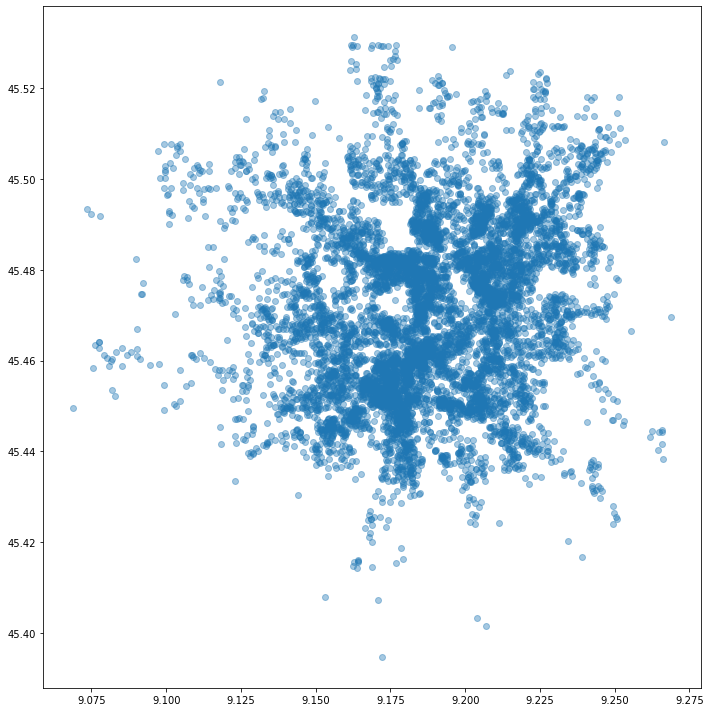

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(milan.longitude, milan.latitude, alpha=.4)
plt.tight_layout()
plt.show()

## Explore data

In [42]:
milan.bedrooms.value_counts()

1     5999
2     1951
0      933
3      333
4       86
5       16
6        1
8        1
7        1
10       1
Name: bedrooms, dtype: int64

In [57]:
milan[['daily_price', 'review_scores_rating', 'bedrooms']].groupby('bedrooms').agg({
    'daily_price': [np.mean, np.std], 'review_scores_rating': [np.mean, np.min]
})

daily_price             review_scores_rating      
                 mean         std                 mean  amin
bedrooms                                                    
0           78.141479  111.815641             9.160129   2.0
1           87.375563  115.499162             9.343224   2.0
2          130.422860  126.480063             9.304305   2.0
3          231.570571  274.528421             9.292492   2.0
4          347.058140  377.551909             9.284884   6.8
5          394.625000  219.700668             9.487500   7.0
6          368.000000         NaN             9.100000   9.1
7         1000.000000         NaN            10.000000  10.0
8          650.000000         NaN             9.600000   9.6
10         200.000000         NaN            10.000000  10.0

In [60]:
dfg = milan[['daily_price', 'bedrooms']].groupby('bedrooms').mean()
dfs = milan[['daily_price', 'bedrooms']].groupby('bedrooms').std()

In [61]:
dfg.head(2)

,daily_price
bedrooms,
0,78.141479
1,87.375563


In [62]:
dfs.head(2)

,daily_price
bedrooms,
0,111.815641
1,115.499162


In [65]:
dfg.join(dfs, lsuffix='_mean', rsuffix='_std')

,daily_price_mean,daily_price_std
bedrooms,,
0,78.141479,111.815641
1,87.375563,115.499162
2,130.422860,126.480063
3,231.570571,274.528421
4,347.058140,377.551909
5,394.625000,219.700668
6,368.000000,NaN
7,1000.000000,NaN
8,650.000000,NaN


In [80]:
df = pd.DataFrame([{'A': 5, 'B': 7}, {'A': 0}])
df.fillna(0, inplace=True)

In [81]:
df.columns = ['prima', 'seconda']

## Better visualization
Aggiungiamo il prezzo e le review alla mappa

In [83]:
colors = np.random.randint(0, 6, size=milan.shape[0])

In [84]:
colors

array([3, 4, 4, ..., 5, 2, 3])

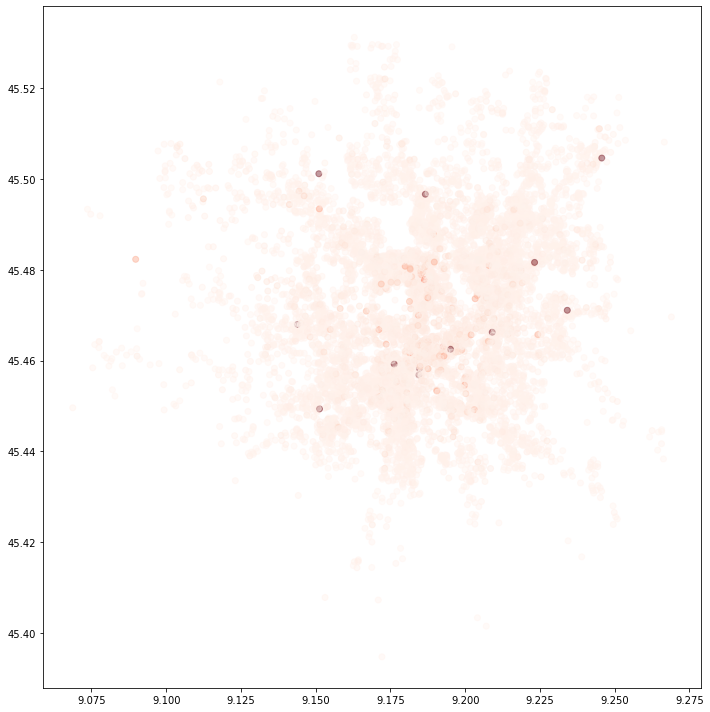

In [88]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(milan.longitude, milan.latitude, alpha=.4, c=milan.daily_price, cmap='Reds')
plt.tight_layout()
plt.show()

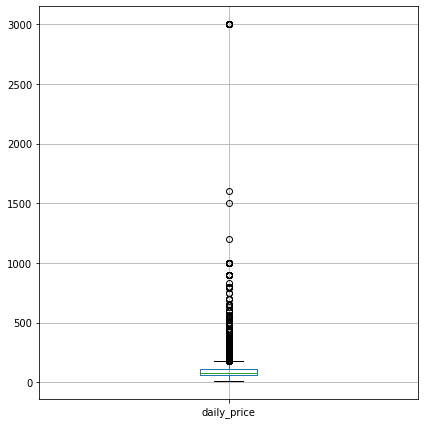

In [90]:
fig, ax = plt.subplots(figsize=(6,6))
milan.boxplot(column='daily_price', ax=ax)
plt.tight_layout()
plt.show()

### Soluzioni
- scalare i dati (log)
- mostrare outlier a parte
- categorizzare

#### scalare i dati (log)

In [94]:
np.log(milan.daily_price)

1       4.543295
2       4.828314
3       4.605170
4       4.787492
5       4.248495
          ...   
9318    4.382027
9319    6.802395
9320    4.248495
9321    4.174387
9322    4.317488
Name: daily_price, Length: 9322, dtype: float64

In [96]:
milan['daily_price_log'] = np.log(milan.daily_price)

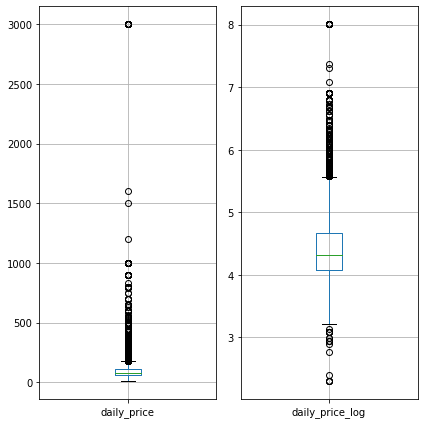

In [98]:
fig, ax = plt.subplots(figsize=(6,6), ncols=2)
milan.boxplot(column='daily_price', ax=ax[0])
milan.boxplot(column='daily_price_log', ax=ax[1])
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), ncols=2)
milan.boxplot(column='daily_price', ax=ax[0])
milan.boxplot(column='daily_price_log', ax=ax[1])
plt.tight_layout()
plt.show()

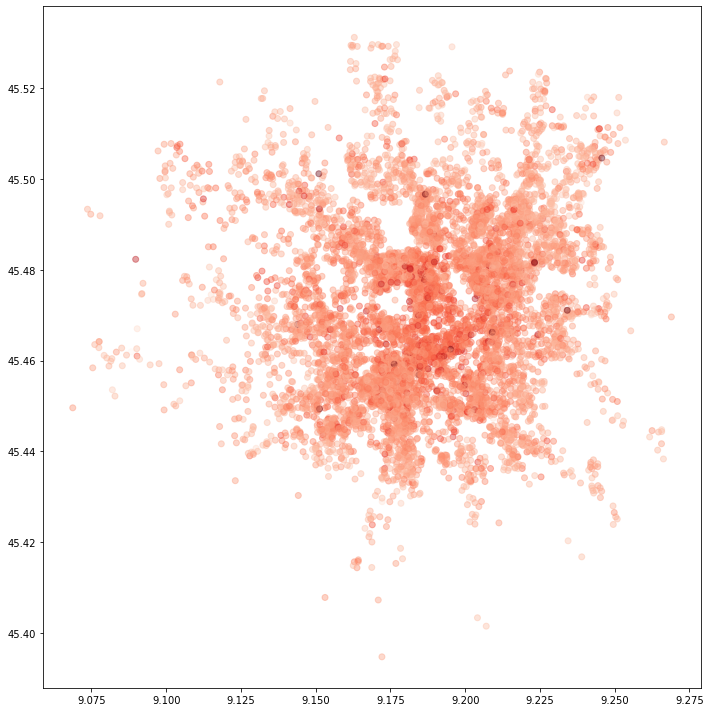

In [97]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(milan.longitude, milan.latitude, alpha=.4, c=milan.daily_price_log, cmap='Reds')
plt.tight_layout()
plt.show()

#### mostrare outlier a parte

In [108]:
threshold = np.percentile(milan.daily_price, range(0, 100, 5))[-2]
threshold
milan_noout = milan[milan.daily_price <= threshold]
milan_out = milan[milan.daily_price > threshold]

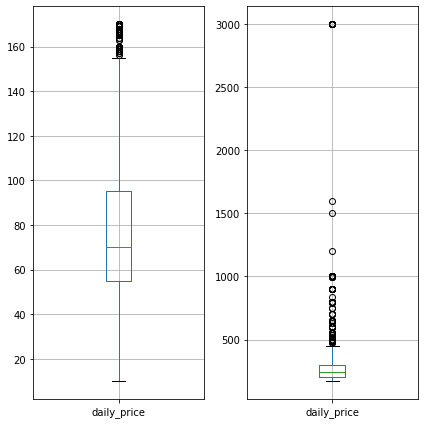

In [109]:
fig, ax = plt.subplots(figsize=(6,6), ncols=2)
milan_noout.boxplot(column='daily_price', ax=ax[0])
milan_out.boxplot(column='daily_price', ax=ax[1])
plt.tight_layout()
plt.show()

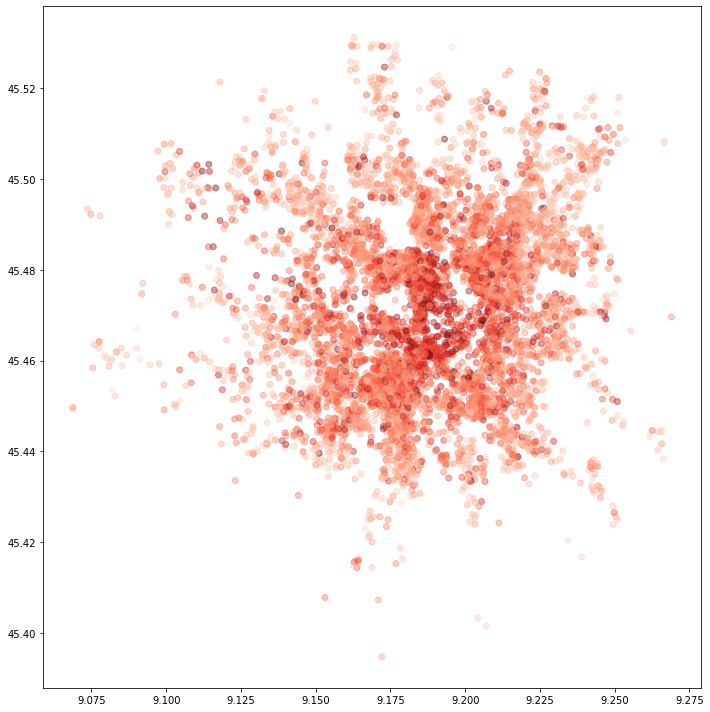

In [110]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(milan_noout.longitude, milan_noout.latitude, alpha=.4, c=milan_noout.daily_price, cmap='Reds')
#ax.scatter(milan_out.longitude, milan_out.latitude, alpha=.4, c=milan_out.daily_price, cmap='Blues')
plt.tight_layout()
plt.show()

#### categorizzare

In [111]:
from collections import defaultdict

In [117]:
categories = defaultdict(list)
thresholds = np.percentile(milan.daily_price, [10, 25, 50, 75, 90])
for i, row in milan.iterrows():
    dp = row.daily_price
    assigned = False
    for j, thr in enumerate(thresholds):
        if dp <= thr:
            categories[j].append(i)
            assigned = True
            break
    if not assigned:
        categories[len(thresholds)].append(i)

In [120]:
C = dict([(k, milan.loc[v]) for k, v in categories.items()])

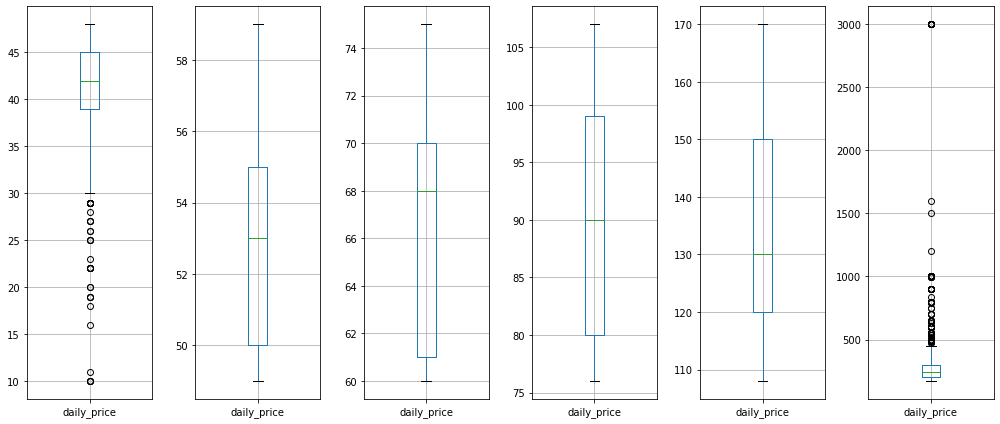

In [126]:
fig, ax = plt.subplots(figsize=(14,6), ncols=len(C))
for k, kdf in C.items():
    kdf.boxplot(column='daily_price', ax=ax[k])
plt.tight_layout()
plt.show()

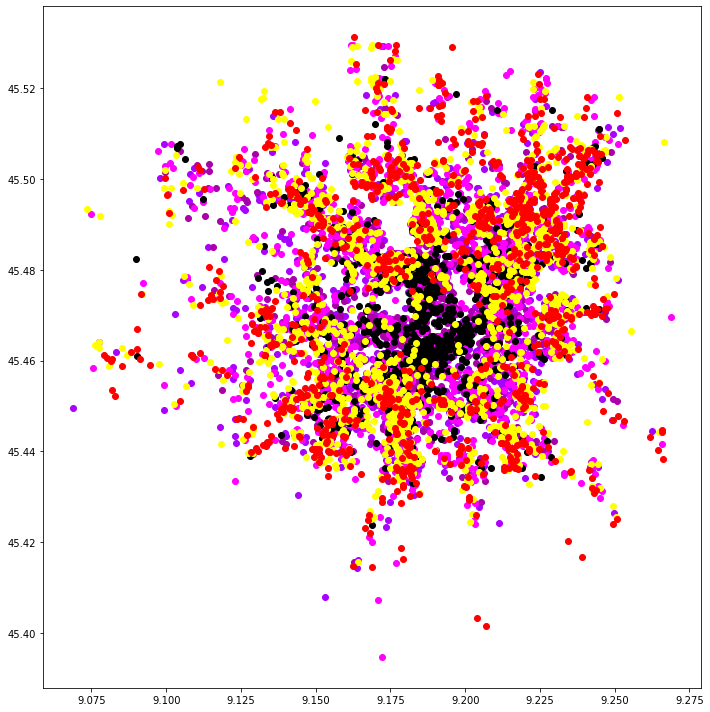

In [130]:
cmap = ['#ff0000', '#ffff00', '#ff00ff', '#aa00ff', '#aa00aa', '#000000']
fig, ax = plt.subplots(figsize=(10,10))
for k, kdf in C.items():
    ax.scatter(kdf.longitude, kdf.latitude, c=cmap[k])
plt.tight_layout()
plt.show()

## Correlazioni e combinazioni di attributi
Studiamo correlazioni interessanti fra feature

In [ ]:
milan.corr().daily_price.sort_values(ascending=False)

## Esempio naive di clustering
Cerchiamo di clusterizzare le offerte più simili combinando `daily_price` e `review_scores_rating`.
Ragioniamo sulla necessità di discretizzare le fasce di prezzo.

In [131]:
S = milan[['daily_price', 'review_scores_rating']]

In [132]:
S.head()

,daily_price,review_scores_rating
1,94,9.4
2,125,10.0
3,100,9.7
4,120,9.7
5,70,9.0


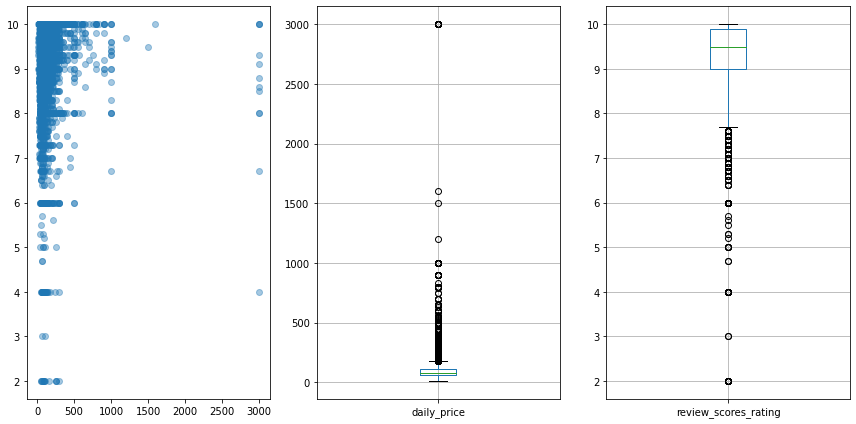

In [133]:
fig, ax = plt.subplots(figsize=(12,6), ncols=3)
ax[0].scatter(S.daily_price, S.review_scores_rating, alpha=0.4)
S[['daily_price']].boxplot(ax=ax[1])
S[['review_scores_rating']].boxplot(ax=ax[2])
plt.tight_layout()
plt.show()

In [134]:
S.corr()

,daily_price,review_scores_rating
daily_price,1.000000,-0.012831
review_scores_rating,-0.012831,1.000000


### Kmeans from scratch

In [142]:
from sklearn.metrics.pairwise import euclidean_distances

In [140]:
k = 4
centroids = np.random.uniform(size=(k, 2)) * 100

In [143]:
D = euclidean_distances(centroids, S)

In [149]:
assignment = []
for i in range(D.shape[1]):
    cluster = np.argmin(D[:,i])
    assignment.append(cluster)

In [153]:
clusters = dict([(cl, []) for cl in range(k)])
for point, cluster in enumerate(assignment):
    clusters[cluster].append(point)

In [166]:
euclidean_distances(centroids[2].reshape(1, -1), S.iloc[clusters[2]]).sum()

173.89505573709943

In [164]:
centroids[2].reshape(1, -1)

array([[56.70549597, 44.06280461]])

In [169]:
S.iloc[clusters[2]].mean(axis=0)

daily_price             10.000000
review_scores_rating     9.733333
dtype: float64

## SKLEARN implementation of Kmeans

In [193]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [194]:
S

,daily_price,review_scores_rating
1,94,9.4
2,125,10.0
3,100,9.7
4,120,9.7
5,70,9.0
...,...,...
9318,80,10.0
9319,900,10.0
9320,70,10.0
9321,65,10.0


In [195]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(S), index=S.index, columns=S.columns)

In [196]:
X

,daily_price,review_scores_rating
1,-0.070571,0.102201
2,0.154150,0.821864
3,-0.027076,0.462032
4,0.117905,0.462032
5,-0.244548,-0.377575
...,...,...
9318,-0.172057,0.821864
9319,5.772166,0.821864
9320,-0.244548,0.821864
9321,-0.280793,0.821864


In [197]:
kmeans = AgglomerativeClustering(n_clusters=k)
assignment = kmeans.fit_predict(X)

In [198]:
assignment

array([0, 0, 0, ..., 0, 0, 0])

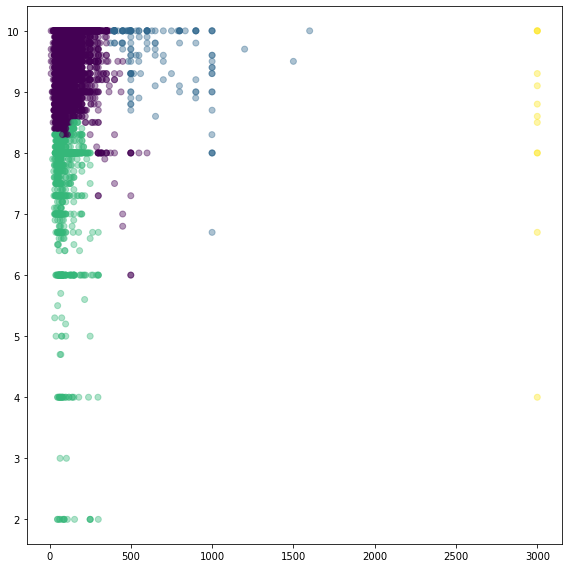

In [199]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(S.daily_price, S.review_scores_rating, alpha=0.4, c=assignment)
plt.tight_layout()
plt.show()

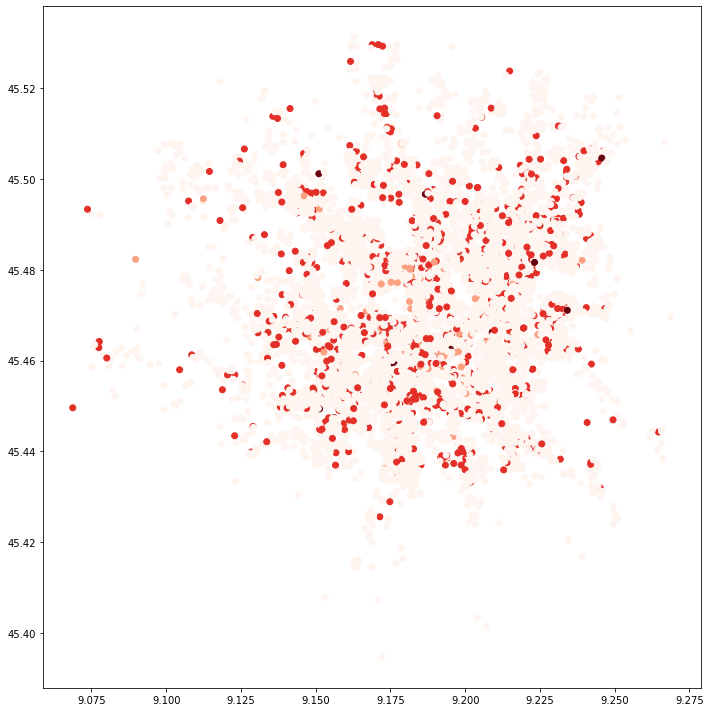

In [200]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(milan.longitude, milan.latitude, c=assignment, cmap='Reds')
plt.tight_layout()
plt.show()